# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 10</span>

### Exercise 10.1

Choose **ONLY ONE** of the two following possibilities:

1. Parallelize with MPI libraries your Genetic Algorithm code in order to solve the TSP by performing a *Genetic Search* with (up to) 11 **parallel GA searches of the optimal path**:
each node should perform an independent GA search, the so-called *Continent*, **but** every $N_{migr}$ generations the *Continents* should exchange their best individuals randomly.

2. Starting from your Genetic Algorithm code implement a **Parallel Tempering algorithm** (Simulated Annealing with many temperatures). Parallelize with MPI libraries your algorithm in order to solve the TSP where each computing node, up to 11, is characterized by a different temperature or a limited set of temperatures (if you need more than 11 temperatures). Use your genetic operators (except crossover) as trial moves for the Metropolis algorithm and **add a trial move that proposes an exchange of paths among adjacent temperatures (nodes)** (see lecture 8 for the acceptance formula). The candidate solution of the TSP will appear on the node with the lower temperature.

### Exercise 10.2

Apply your parallel code to the TSP problem for 110 italian "capoluoghi di provincia" longitude and latitude coordinates in the *cap_prov_ita.dat* file.

If your choice in Exercise 10.1 is option 1, do you improve with respect using the same number of computing cores but with **independent GA searches** ?

If your choice in Exercise 10.1 is option 2, by using a number of temperatures equal to the number of individuals in your **non-parallel Genetic Algorithm code**, do you "improve" with respect to it?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
plt.rcParams.update({
    'font.family':'cmr10',
    'mathtext.fontset': 'cm',
    'axes.formatter.use_mathtext': True,
    'figure.figsize': [6.0, 6.0],
    'axes.labelsize': 20,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'font.size':10,
    'savefig.directory':'./Images'
})

In [18]:
c=np.loadtxt("FILE/PATH/element_499_0.txt",delimiter='\t',skiprows=0)

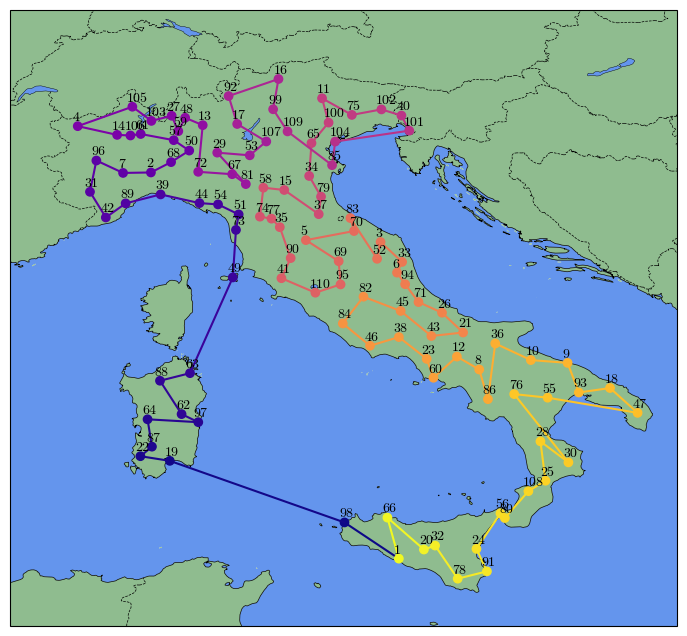

In [19]:
fig, axs = plt.subplots(1, 1, figsize=(9,8), subplot_kw={'projection': ccrs.PlateCarree()}, gridspec_kw={'wspace': 0.02})

for i in range(1) :
    axs.set_extent([6, 19, 36, 48], crs=ccrs.PlateCarree())
    axs.add_feature(cfeature.OCEAN, facecolor='cornflowerblue')
    axs.add_feature(cfeature.LAND, facecolor='darkseagreen')
    axs.add_feature(cfeature.COASTLINE, lw=0.5)
    axs.add_feature(cfeature.BORDERS, linestyle='--', lw=0.5)
    axs.add_feature(cfeature.LAKES, edgecolor='black', facecolor='cornflowerblue', linewidth=0.3)
x = c[:,1]
y = c[:,2]
l = c[:,0]
f = np.arange(len(x))
axs.scatter(x,y,c=f,cmap='plasma_r',zorder=2)
cmap = plt.get_cmap('plasma_r')
colors = cmap(f/f.max())
for i,txt in enumerate(l):
    axs.annotate(int(txt),(x[i]-0.1,y[i]+0.1))
    axs.plot(x[i:i+2],y[i:i+2],color=colors[i])
axs.plot([x[-1],x[0]],[y[-1],y[0]],color=colors[-1],zorder=1)

In [20]:
gen=500

In [21]:
e =[]
for i in range(0,gen):
    a = np.loadtxt("FILE/LOSS/l2_gen"+str(i)+".txt",delimiter='\t',skiprows=0)
    e.append(a)

In [22]:
best = np.zeros(gen)
y = np.zeros(gen)
err = np.zeros(gen)
x = np.arange(0,gen) +1
for i in range(0,gen):
    y[i] = e[i][:50,1].mean()
    err[i] = e[i][:50,1].var()
    best[i] = e[i][0,1]

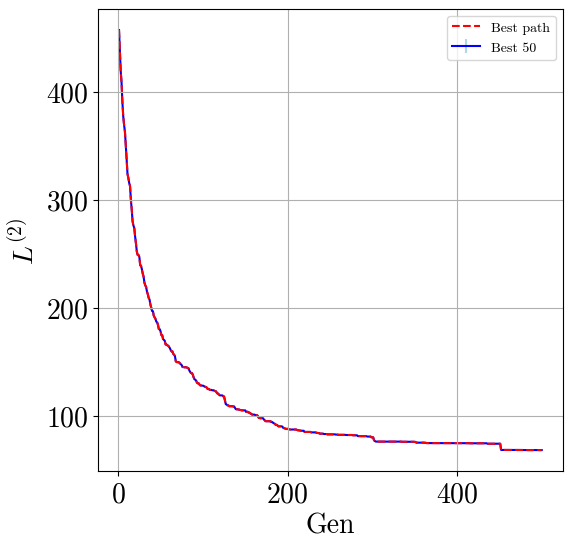

In [23]:
plt.errorbar(x,y,err,color='b',ecolor='lightblue',label='Best 50',zorder=0)
plt.plot(x,best,linestyle='--',color='r',label='Best path',zorder=1)
plt.legend()
plt.ylabel('$L^{(2)}$')
plt.xlabel('Gen')
plt.grid()
plt.show()

In [24]:
y

array([456.871 , 438.734 , 418.874 , 408.278 , 390.127 , 376.969 ,
       368.947 , 362.78  , 350.491 , 337.31  , 323.749 , 320.101 ,
       315.422 , 312.562 , 299.734 , 290.987 , 279.999 , 276.018 ,
       273.89  , 265.839 , 259.379 , 252.041 , 248.855 , 248.713 ,
       246.922 , 239.195 , 238.782 , 235.524 , 231.562 , 228.787 ,
       223.101 , 220.703 , 219.113 , 214.952 , 212.415 , 209.054 ,
       207.656 , 203.111 , 199.975 , 196.968 , 196.796 , 192.641 ,
       191.069 , 189.737 , 187.112 , 186.448 , 184.095 , 180.204 ,
       180.204 , 178.229 , 174.688 , 174.515 , 170.974 , 170.134 ,
       169.438 , 165.969 , 165.969 , 165.214 , 164.823 , 163.933 ,
       162.561 , 160.778 , 159.604 , 159.604 , 157.359 , 156.462 ,
       155.256 , 150.455 , 149.676 , 149.592 , 149.592 , 149.286 ,
       148.496 , 147.811 , 146.843 , 145.139 , 145.139 , 144.888 ,
       144.888 , 144.888 , 144.667 , 144.375 , 143.928 , 141.93  ,
       140.534 , 139.509 , 139.509 , 138.243 , 135.752 , 133.7